# Load and Visualize MgSiO3 melt Data
* Focus on classical simulations of Spera et al. (2011)
    * we only analyze simulations produced with high-pressure potential set of Oganov et al. (2000)
* Also load First Principles MD data from deKoker et al. (2009)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import pickle
# import emcee

import xmeos
from xmeos import models
from xmeos import datamod

## Load Analysis File
* This pickle file stores all of the intermediate results from the notebooks

In [2]:
# Average molar mass of MgSiO3
mass_avg = (24.31+28.09+3*16.0)/5.0 # g/(mol atom)

CONSTS = models.CONSTS


def read_data_Spera2011():
    title = 'Spera2011'
    delT = 500
    datasource = 'data/MgSiO3-Oganov-md-Spera2011.csv'
    data = pd.read_csv(datasource)
    
    Vconv = CONSTS['ang3percc']*mass_avg/CONSTS['Nmol'] # (ang^3/atom) / (cc/g)
    Econv = mass_avg/CONSTS['kJ_molpereV'] # (eV/atom) / (kJ/g)

    data = datamod.load_data(V=data['vol[cc/gm]'], P=data['P [GPa]'],
                             T=data['T [K]'], E=data['Etot [kJ/gm]'],
                             Perr=data['P_err [GPa]'],
                             Terr=data['T_err [K]'], 
                             Eerr=data['Etot_err [kJ/gm]'],
                             title=title, datasource=datasource,
                             Vconv=Vconv, Econv=Econv, mass_avg=mass_avg)
    
    # datamod.set_uncertainty_scale(data)
    tbl = data['table']
    
    tbl['T_label'] = delT*np.round(tbl['T']/delT)
    Tlbl = np.unique(tbl['T_label'])
    data['T_labels'] = Tlbl
    
    Vlbl = np.unique(tbl['V'])
    tbl['V_label'] = np.round(tbl['V'], decimals=2)
    data['V_labels'] = Vlbl
    
    return data

def read_data_deKoker2009():
    title = 'deKoker2009'
    delT = 1000
    datasource = 'data/MgSiO3-fpmd-deKoker2009.csv'
    VX = 38.9 #cc^3/mol formula (From Stixrude and ddKarki 2005)
    natom = 5
    
    # E = [kJ/mol formula]
    Vconv = CONSTS['ang3percc']/natom/CONSTS['Nmol'] # (ang^3/atom) / (cc/mol)
    Econv = 1/natom/CONSTS['kJ_molpereV'] # (eV/atom) / (kJ/mol)
    
    data = pd.read_csv(datasource)
    data = datamod.load_data(V=VX*data['V/VX'], P=data['P'],
                             T=data['T'], E=data['E'],
                             title=title, datasource=datasource,
                             Vconv=Vconv, Econv=Econv, mass_avg=mass_avg)
    
    # datamod.set_uncertainty_scale(data)
    tbl = data['table']
    
    tbl['T_label'] = delT*np.round(tbl['T']/delT)
    Tlbl = np.unique(tbl['T_label'])
    delT = np.min(np.diff(Tlbl))
    Tlbl = np.arange(Tlbl[0],Tlbl[-1]+delT/2,delT)
    data['T_labels'] = Tlbl
    
    Vlbl = np.unique(tbl['V'])
    tbl['V_label'] = np.round(tbl['V'], decimals=2)
    data['V_labels'] = Vlbl
    
    return data
        
def load_datasets():
    datasets = {}
    datasets['Spera2011'] = read_data_Spera2011()
    datasets['deKoker2009'] = read_data_deKoker2009()
    return datasets

datasets = load_datasets()


In [3]:
analysis_file = 'data/analysis.pkl'
try:
    with open(analysis_file, 'rb') as f:
        analysis = pickle.load(f)
except:
    analysis = {}

In [4]:
# Store data for later use
analysis['composition'] = 'MgSiO3'
analysis['datasets'] = datasets

with open(analysis_file, 'wb') as f:
    pickle.dump(analysis, f)



In [5]:
data = datasets['Spera2011']
# View data tables
tbl = data['table']
tbl.head()

,V,T,P,E,Verr,Terr,Perr,Eerr,T_label,V_label
0,14.187387,2559,-0.88,-20.740898,0,19,0.19,0.000083,2500.0,14.19
1,14.187387,3058,-0.77,-20.571909,0,22,0.21,0.000021,3000.0,14.19
2,14.187387,3537,-0.59,-20.411336,0,24,0.21,0.000021,3500.0,14.19
3,14.187387,4005,-0.33,-20.258619,0,29,0.24,0.000041,4000.0,14.19
4,14.187387,4484,0.01,-20.108494,0,32,0.24,0.000021,4500.0,14.19


## Visualize MD data of Spera et al. (2011)

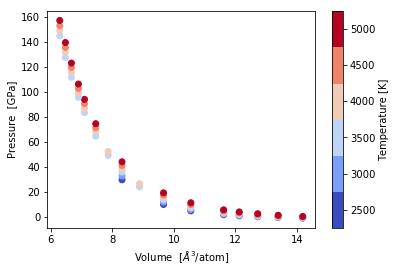

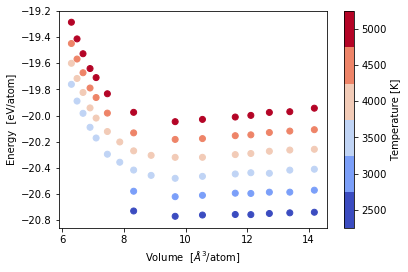

In [6]:
# Set colorbar temperature properties
cmap = plt.get_cmap('coolwarm',len(data['T_labels']))
delT = np.diff(data['T_labels'])[0]



plt.figure()
plt.scatter(tbl['V'],tbl['P'],c=tbl['T'], cmap=cmap)
plt.xlabel(r'Volume  [$\AA^3$/atom]')
plt.ylabel(r'Pressure  [GPa]')
cbar = plt.colorbar()
cbar.set_ticks(data['T_labels'])
cbar.set_label('Temperature [K]')
plt.clim(data['T_labels'][0]-delT/2,data['T_labels'][-1]+delT/2)


plt.figure()
plt.scatter(tbl['V'],tbl['E'],c=tbl['T'], cmap=cmap)
plt.xlabel(r'Volume  [$\AA^3$/atom]')
plt.ylabel(r'Energy  [eV/atom]')
cbar = plt.colorbar()
cbar.set_ticks(data['T_labels'])
cbar.set_label('Temperature [K]')
plt.clim(data['T_labels'][0]-delT/2,data['T_labels'][-1]+delT/2)